In [2]:
import netCDF4 as nc
import matplotlib.pyplot as plt

# Open the NetCDF file
file_path = './dotnc/pr_2021.nc'  # Update with your NetCDF file path
dataset = nc.Dataset(file_path)

# Assume 'lat', 'lon', and 'precipitation_amount' are the variable names in your NetCDF file
latitudes = dataset.variables['lat'][:]
longitudes = dataset.variables['lon'][:]
precipitation_amount = dataset.variables['precipitation_amount'][:]  # Adjust according to your file

# Select a specific time step (for example, the first time step)
# Assuming the dimensions are (time, latitude, longitude)
# Change the index [0] to whatever time step you want to visualize
precipitation_slice = precipitation_amount[0, :, :]  # Select the first time step

dataset.close()




Latitudes shape: (585,)
Longitudes shape: (1386,)
Precipitation shape: (585, 1386)


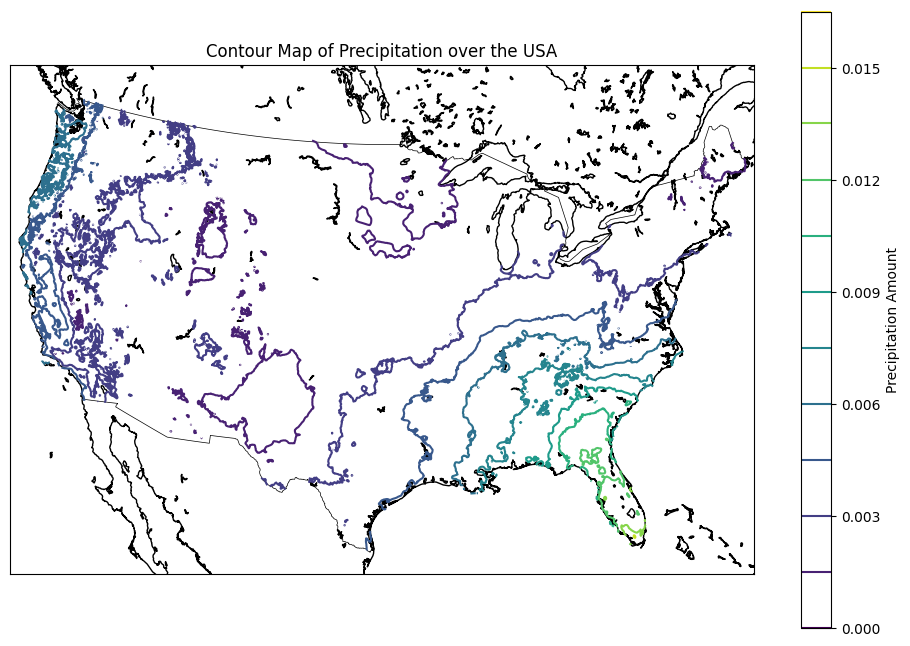

In [2]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

# Open the NetCDF file
file_path = './dotnc/sph_2021.nc'  # Update with your NetCDF file path
dataset = nc.Dataset(file_path)

# Assume 'lat', 'lon', and 'precipitation_amount' are the variable names in your NetCDF file
latitudes = dataset.variables['lat'][:]
longitudes = dataset.variables['lon'][:]
# req_thing = 'precipitation_amount'

req_thing = 'specific_humidity'
precipitation_amount = dataset.variables[req_thing][:]  # Adjust according to your file

# Select a specific time step (for example, the first time step)
precipitation_slice = precipitation_amount[0, :, :]  # Select the first time step

# Ensure latitudes and longitudes are 1D arrays and precipitation_slice is 2D
print('Latitudes shape:', latitudes.shape)
print('Longitudes shape:', longitudes.shape)
print('Precipitation shape:', precipitation_slice.shape)

# Create a Basemap instance
plt.figure(figsize=(12, 8))
m = Basemap(projection='lcc', resolution='i', 
            lat_0=37.5, lon_0=-96,
            llcrnrlon=-119, urcrnrlon=-64, 
            llcrnrlat=22, urcrnrlat=50)

# Draw coastlines and states
m.drawcoastlines()
# m.drawstates()
m.drawcountries()

# Convert lat/lon to map projection coordinates
# Use np.meshgrid to create 2D arrays of coordinates
lon_grid, lat_grid = np.meshgrid(longitudes, latitudes)
x, y = m(lon_grid, lat_grid)

# Create contour map
contour = m.contour(x, y, precipitation_slice, levels=10, cmap='viridis')
plt.colorbar(contour, label='Precipitation Amount')

# Add labels to the contours
plt.clabel(contour, inline=True, fontsize=8, fmt='%1.111f')

plt.title('Contour Map of Precipitation over the USA')
plt.show()

dataset.close()


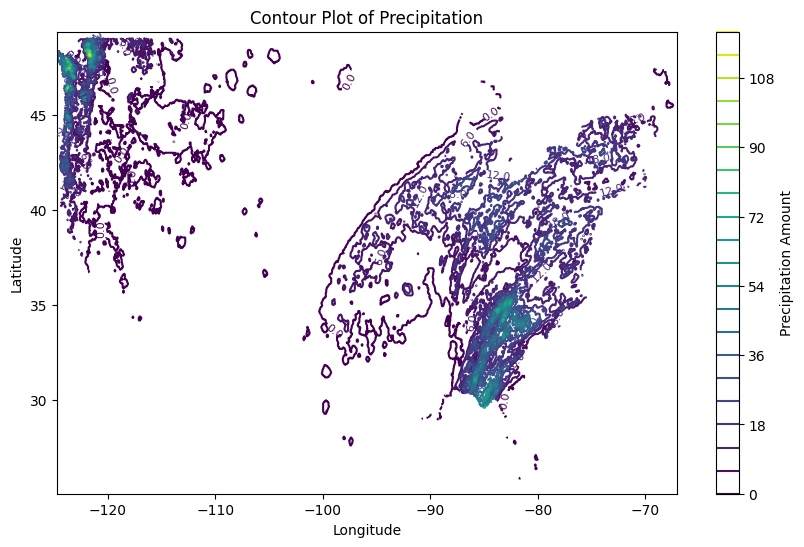

In [3]:
# plotting
plt.figure(figsize=(10, 6))
contour = plt.contour(longitudes, latitudes, precipitation_slice, levels=20, cmap='viridis')
plt.colorbar(contour, label='Precipitation Amount')
plt.clabel(contour, inline=True, fontsize=8, fmt='%1.1f')
plt.title('Contour Plot of Precipitation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()